# Efficiency test of Fibonachi functions

In [1]:
def test_fibo(func: callable) -> bool:
    assert func(1) == 1
    assert func(2) == 1
    assert func(3) == 2
    assert func(10) == 55
    assert func(20) == 6765
    return True

## fib2 - recursion

In [2]:
def fib2(n: int) -> int:
    if n < 2:
        return n
    return fib2(n-2) + fib2(n-1)

In [3]:
test_fibo(fib2)

True

## fib3 - recursion with memoization

In [4]:
from functools import lru_cache

@lru_cache(maxsize=None)
def fib3(n: int) -> int:
    if n < 2:
        return n
    return fib3(n-2) + fib3(n-1)

In [5]:
test_fibo(fib3)

True

## fib4 - iteration

In [6]:
def fib4(n: int) -> int:
    if n == 0: return n
    last: int = 0
    next: int = 1
    for _ in range(1, n):
        last, next = next, last + next
    return next

In [7]:
test_fibo(fib4)

True

# Plots

In [8]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

In [9]:
from typing import List

def test_efficiency(func: callable, cases: List[int]) -> dict:   
    print(f"testing function: {func.__name__}")
    res = dict()
    for c in cases:
        t = %timeit -o func(c)
        res[c] = t
    return res

In [10]:
from typing import Tuple

def get_efficiency_data(functions: Tuple[callable], limit: int) -> dict:
    cases = list(range(1, limit))
    res = dict()
    for f in functions:
        e = test_efficiency(f, cases)
        res[f.__name__] = e
    return res  

In [11]:
functions = (fib2, fib3, fib4)

In [12]:
data = get_efficiency_data(functions, limit=10)

testing function: fib2
122 ns ± 0.489 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
389 ns ± 1.64 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
643 ns ± 2.73 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.2 µs ± 9.32 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.97 µs ± 17.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
3.25 µs ± 17.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.39 µs ± 25 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
9.45 µs ± 289 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
14.8 µs ± 651 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
testing function: fib3
104 ns ± 4.14 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
104 ns ± 0.669 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
105 ns ± 0.0123 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
107 ns ± 0.207 ns per loop (mean ± std. dev. of 7

In [13]:
def plot_efficiency(data: dict, flag: str ='best') -> None:
    for function in data:
        xa = data[function].keys()
        ya = [getattr(v, flag) for v in data[function].values()]
        plt.plot(xa, ya)
    plt.xticks(list(xa))
    plt.legend(labels=[f for f in data])
    plt.show()

## best execusion time

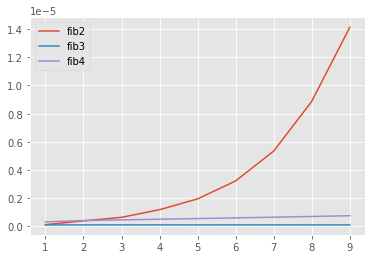

In [14]:
plot_efficiency(data, flag='best')

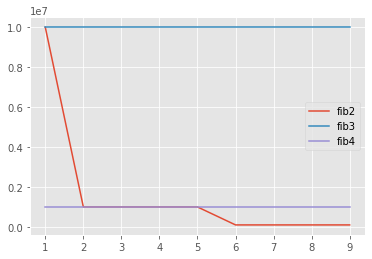

In [15]:
plot_efficiency(data, flag='loops')

#### excluding fib2

testing function: fib3
107 ns ± 0.0835 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
106 ns ± 0.308 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
105 ns ± 0.013 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
106 ns ± 0.0103 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
105 ns ± 0.017 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
105 ns ± 0.474 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
105 ns ± 0.00581 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
105 ns ± 0.00996 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
107 ns ± 0.00584 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
105 ns ± 0.284 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
105 ns ± 0.00928 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
105 ns ± 0.0184 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
105 ns ± 0.00516 ns per loop (mean ± std. 

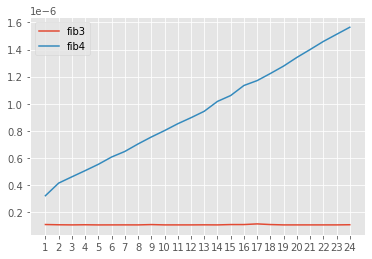

In [16]:
data = get_efficiency_data((fib3, fib4), limit=25)
plot_efficiency(data, flag='best')

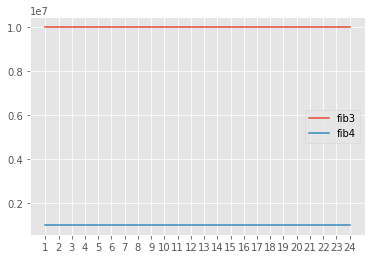

In [17]:
plot_efficiency(data, flag='loops')

# function 'fib3' is the most efficiency